In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *
from fastai.custom_extensions import *

from planet import *

In [3]:
PATH = "data/planet_amazon/"

In [6]:
# !rm -r {PATH}tmp

In [4]:
sz = 64
bs = 64
arch = resnet34
metrics = [f2]

In [5]:
label_csv = f'{PATH}train_v2.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [6]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    data = ImageClassifierData.from_csv(PATH, 'train-jpg', label_csv, bs=bs, tfms=tfms, val_idxs=val_idxs,
                                        suffix='.jpg', test_name='test-jpg')
    return data

In [7]:
data = get_data(sz,bs)

In [8]:
learn = ConvLearner.pretrained(arch, data, metrics=metrics)

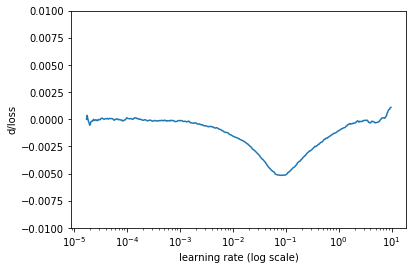

In [16]:
learn.lr_find()
# learn.sched.plot()
# learn.sched
plot_loss_change(learn.sched, sma=20, y_lim=(-0.01, 0.01))

In [9]:
lr = 0.1
lrs = np.array([lr/9, lr/3, lr])

In [14]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch:   0, train_loss: 0.152685, val_loss: 0.138167, f2: 0.877177
epoch:   1, train_loss: 0.142373, val_loss: 0.130198, f2: 0.883771
epoch:   2, train_loss: 0.137227, val_loss: 0.127901, f2: 0.886660
epoch:   3, train_loss: 0.135994, val_loss: 0.125930, f2: 0.888381
epoch:   4, train_loss: 0.135838, val_loss: 0.124263, f2: 0.889541
epoch:   5, train_loss: 0.130080, val_loss: 0.123876, f2: 0.891334
epoch:   6, train_loss: 0.131767, val_loss: 0.123263, f2: 0.891722



In [15]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch:   0, train_loss: 0.120815, val_loss: 0.111814, f2: 0.903707
epoch:   1, train_loss: 0.111490, val_loss: 0.103520, f2: 0.910925
epoch:   2, train_loss: 0.108238, val_loss: 0.099925, f2: 0.915254
epoch:   3, train_loss: 0.105477, val_loss: 0.102328, f2: 0.912998
epoch:   4, train_loss: 0.103476, val_loss: 0.099246, f2: 0.914299
epoch:   5, train_loss: 0.098077, val_loss: 0.097129, f2: 0.917186
epoch:   6, train_loss: 0.095847, val_loss: 0.096643, f2: 0.917515



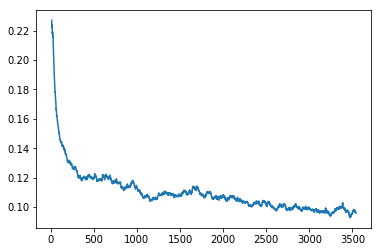

In [16]:
learn.sched.plot_loss()

In [17]:
sz = 128
learn.set_data(get_data(sz, bs))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch:   0, train_loss: 0.100646, val_loss: 0.098074, f2: 0.916093
epoch:   1, train_loss: 0.099289, val_loss: 0.096065, f2: 0.917750
epoch:   2, train_loss: 0.096553, val_loss: 0.095798, f2: 0.917359
epoch:   3, train_loss: 0.101088, val_loss: 0.095690, f2: 0.918553
epoch:   4, train_loss: 0.097899, val_loss: 0.094631, f2: 0.919000
epoch:   5, train_loss: 0.092665, val_loss: 0.094517, f2: 0.918852
epoch:   6, train_loss: 0.094987, val_loss: 0.094268, f2: 0.919761



In [18]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch:   0, train_loss: 0.095916, val_loss: 0.090821, f2: 0.923662
epoch:   1, train_loss: 0.092863, val_loss: 0.089728, f2: 0.924060
epoch:   2, train_loss: 0.089831, val_loss: 0.088767, f2: 0.925391
epoch:   3, train_loss: 0.092242, val_loss: 0.090657, f2: 0.923547
epoch:   4, train_loss: 0.088225, val_loss: 0.088452, f2: 0.924449
epoch:   5, train_loss: 0.082707, val_loss: 0.087150, f2: 0.926718
epoch:   6, train_loss: 0.082579, val_loss: 0.087158, f2: 0.926721



In [10]:
learn.load('128')

In [ ]:
sz = 256
learn.set_data(get_data(sz,bs))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch:   0, train_loss: 0.091056, val_loss: 0.092926, f2: 0.920818
epoch:   1, train_loss: 0.093375, val_loss: 0.091919, f2: 0.921884
epoch:   2, train_loss: 0.091686, val_loss: 0.091021, f2: 0.922766
epoch:   3, train_loss: 0.090632, val_loss: 0.091508, f2: 0.921274
epoch:   4, train_loss: 0.090127, val_loss: 0.091049, f2: 0.922365
epoch:   5, train_loss: 0.088842, val_loss: 0.090842, f2: 0.922526
epoch:   6, train_loss: 0.087577, val_loss: 0.089899, f2: 0.924129



In [ ]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch:   0, train_loss: 0.088744, val_loss: 0.085960, f2: 0.929245
epoch:   1, train_loss: 0.087881, val_loss: 0.085499, f2: 0.927882
epoch:   2, train_loss: 0.085873, val_loss: 0.084797, f2: 0.929466
epoch:   3, train_loss: 0.085680, val_loss: 0.084402, f2: 0.929638
epoch:   4, train_loss: 0.084880, val_loss: 0.084967, f2: 0.928340
epoch:   5, train_loss: 0.081389, val_loss: 0.084623, f2: 0.929846


In [9]:
learn.load('256')

In [10]:
preds = learn.TTA(is_test=True)

In [11]:
avgs = np.mean(preds[0],0)

In [12]:
classes = np.array(data.classes)

In [13]:
res = [ " ".join(classes[np.where(x > 0.2)]) for x in avgs ]
fnames = data.test_ds.fnames

In [14]:
df = pd.DataFrame(res)
df.insert(0, 'image_name', [name[9:-4] for name in fnames])
df.columns = ["image_name", "tags"]
df.head()

,image_name,tags
0,test_25202,agriculture clear cultivation habitation primary
1,test_5717,blooming clear primary
2,test_40598,agriculture clear primary road water
3,file_2096,clear primary water
4,file_19729,partly_cloudy primary


In [15]:
filename = 'resnet34_v3'

SUBM = f'{PATH}subm/'
os.makedirs(SUBM, exist_ok=True)
df.to_csv(SUBM+filename, index=False)

In [16]:
!kg submit {SUBM+filename} -c planet-understanding-the-amazon-from-space

0.84037
